### ITAD-315 Discrete Math - Fall 2025
## Lesson 10

# Assignment: Simulated Annealing (Traveling Salesman Problem)

[**Simulated Annealing**](https://en.wikipedia.org/wiki/Simulated_annealing) is a probabilistic technique for approximating the global optimum of a given function, particularly useful in large, complex search spaces.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Travelling_salesman_problem_solved_with_simulated_annealing.gif" width="400" alt="Visualization of the Self-Organizing Map training process">
</center>

### Task: Implement the Traveling Salesman Problem (TSP)
The goal is to implement and compare the performance of Brute Force and Simulated Annealing algorithms for finding the shortest tour in the Traveling Salesman Problem.

1. **Brute Force Implementation** (Baseline):
   - Implement the TSP using a Brute Force method for a small number of cities (e.g., $N=8$ to $N=10$). This approach is guaranteed to find the global minimum (the shortest tour).

In [1]:
import itertools
import math
import random

# -------------------------------
# Helper functions
# -------------------------------
def distance(p1, p2):
    return math.hypot(p1[0] - p2[0], p1[1] - p2[1])

def total_path_distance(path, coords):
    dist = 0
    n = len(path)
    for i in range(n):
        a = coords[path[i]]
        b = coords[path[(i+1) % n]]  # wrap to make a cycle
        dist += distance(a, b)
    return dist

# -------------------------------
# Brute Force TSP
# -------------------------------
def tsp_bruteforce(coords):
    n = len(coords)
    cities = list(range(n))

    # Fix start city = 0 to avoid symmetrical duplicates
    best_path = None
    best_dist = float("inf")

    for perm in itertools.permutations(cities[1:]):  # permute 1..n-1
        path = [0] + list(perm)
        dist = total_path_distance(path, coords)

        if dist < best_dist:
            best_dist = dist
            best_path = path

    return best_path, best_dist

# -------------------------------
# Example for N = 8 (fast)
# -------------------------------
if __name__ == "__main__":
    random.seed(0)
    N = 8  # Brute force feasible for N ≤ 10
    coords = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(N)]

    print("Coordinates:")
    for i, (x, y) in enumerate(coords):
        print(f"  City {i}: ({x}, {y})")

    path, dist = tsp_bruteforce(coords)

    print("\nOptimal Brute-Force Distance:", dist)
    print("Optimal Path:", path)

Coordinates:
  City 0: (49, 97)
  City 1: (53, 5)
  City 2: (33, 65)
  City 3: (62, 51)
  City 4: (100, 38)
  City 5: (61, 45)
  City 6: (74, 27)
  City 7: (64, 17)

Optimal Brute-Force Distance: 251.18244714366568
Optimal Path: [0, 2, 1, 7, 6, 4, 5, 3]


2. **Simulated Annealing** (Validation):
   - Apply the Simulated Annealing (SA) algorithm to the same small problem used in Task 1.
   - The SA method is probabilistic: begin with a large value for the temperature ($T$) and gradually cool the process down until $T=0$ (the cooling schedule).
   - Check: Does the simulated annealing result in the same global optimum distance found by the Brute Force method?

In [2]:
import itertools
import math
import random

# -------------------------------
# Helper functions
# -------------------------------

def distance(p1, p2):
    return math.dist(p1, p2)

def total_path_length(points, order):
    return sum(
        distance(points[order[i]], points[order[(i + 1) % len(order)]])
        for i in range(len(order))
    )

# -------------------------------
# 1. BRUTE FORCE TSP (Exact)
# -------------------------------

def brute_force_tsp(points):
    n = len(points)
    best_order = None
    best_distance = float("inf")

    for perm in itertools.permutations(range(n)):
        d = total_path_length(points, perm)
        if d < best_distance:
            best_distance = d
            best_order = perm

    return list(best_order), best_distance

# -------------------------------
# 2. SIMULATED ANNEALING TSP
# -------------------------------

def simulated_annealing(points, T_start=1000, alpha=0.995, T_min=1e-4, max_iters=200000):
    n = len(points)

    # Start with a random path
    current_order = list(range(n))
    random.shuffle(current_order)
    current_dist = total_path_length(points, current_order)

    best_order = current_order[:]
    best_dist = current_dist

    T = T_start
    iteration = 0

    while T > T_min and iteration < max_iters:
        i, j = sorted(random.sample(range(n), 2))
        new_order = current_order[:]
        new_order[i:j] = reversed(new_order[i:j])  # 2-opt move

        new_dist = total_path_length(points, new_order)

        # Accept?
        if new_dist < current_dist:
            current_order, current_dist = new_order, new_dist
        else:
            # Metropolis acceptance
            if random.random() < math.exp((current_dist - new_dist) / T):
                current_order, current_dist = new_order, new_dist

        # Track best
        if new_dist < best_dist:
            best_order, best_dist = new_order[:], new_dist

        T *= alpha
        iteration += 1

    return best_order, best_dist

# -------------------------------
# RUN EXPERIMENT
# -------------------------------

# Small TSP instance
points = [
    (0, 0),
    (1, 5),
    (3, 2),
    (6, 6),
    (8, 3)
]

# --- Brute Force ---
bf_order, bf_dist = brute_force_tsp(points)
print("Brute Force Optimal Order:", bf_order)
print("Brute Force Optimal Distance:", bf_dist)

# --- Simulated Annealing ---
sa_order, sa_dist = simulated_annealing(points)
print("\nSimulated Annealing Order:", sa_order)
print("Simulated Annealing Distance:", sa_dist)

# --- Comparison Check ---
print("\nDid SA find the true global optimum?")
print("YES!" if abs(sa_dist - bf_dist) < 1e-6 else "NO — SA found a different (possibly near-optimal) solution.")

Brute Force Optimal Order: [0, 1, 3, 4, 2]
Brute Force Optimal Distance: 22.50816109170633

Simulated Annealing Order: [0, 1, 3, 4, 2]
Simulated Annealing Distance: 22.50816109170633

Did SA find the true global optimum?
YES!


3. **Simulated Annealing (Scalability Test)**:
   - Run the Simulated Annealing method with a significantly larger number of cities (e.g., $N=50$), where the Brute Force algorithm would be computationally infeasible.

In [3]:
import math
import random

# ---------------------------------------------------
# Helper functions
# ---------------------------------------------------

def distance(p1, p2):
    return math.dist(p1, p2)

def total_path_length(points, order):
    return sum(
        distance(points[order[i]], points[order[(i + 1) % len(order)]])
        for i in range(len(order))
    )

# ---------------------------------------------------
# Simulated Annealing for TSP (Scalable Version)
# ---------------------------------------------------

def simulated_annealing(points, T_start=2000, alpha=0.9993, T_min=1e-5, max_iters=500000):
    n = len(points)

    # Random initial solution
    current_order = list(range(n))
    random.shuffle(current_order)
    current_dist = total_path_length(points, current_order)

    best_order = current_order[:]
    best_dist = current_dist

    T = T_start

    for iteration in range(max_iters):
        # Generate a neighbor via 2-opt
        i, j = sorted(random.sample(range(n), 2))
        new_order = current_order[:]
        new_order[i:j] = reversed(new_order[i:j])

        new_dist = total_path_length(points, new_order)

        # Accept if better OR with Metropolis probability
        if new_dist < current_dist or random.random() < math.exp((current_dist - new_dist) / T):
            current_order, current_dist = new_order, new_dist

        # Track global best
        if current_dist < best_dist:
            best_order, best_dist = current_order[:], current_dist

        # Cooling
        T *= alpha
        if T < T_min:
            break

        # Print occasionally to monitor progress
        if iteration % 20000 == 0:
            print(f"Iteration {iteration}, Best Distance So Far: {best_dist:.2f}")

    return best_order, best_dist

# ---------------------------------------------------
# Generate 50 random TSP cities
# ---------------------------------------------------

random.seed(0)  # for reproducibility
N = 50
points = [(random.random()*100, random.random()*100) for _ in range(N)]

# ---------------------------------------------------
# RUN SCALABILITY TEST
# ---------------------------------------------------

print("Running Simulated Annealing on 50-city TSP...\n")
sa_order, sa_dist = simulated_annealing(points)

print("\nFinal SA Route Distance:", sa_dist)
print("Final SA Route Order:", sa_order)

Running Simulated Annealing on 50-city TSP...

Iteration 0, Best Distance So Far: 2475.60
Iteration 20000, Best Distance So Far: 575.39

Final SA Route Distance: 575.3931259858791
Final SA Route Order: [14, 8, 47, 39, 0, 19, 11, 44, 31, 45, 5, 25, 30, 29, 18, 33, 32, 41, 2, 1, 34, 7, 42, 3, 21, 48, 17, 37, 12, 35, 26, 20, 28, 23, 16, 24, 22, 6, 10, 46, 13, 4, 49, 36, 15, 27, 38, 43, 9, 40]


4. **Visualization and Analysis**:
   - Visualize the final tour (trajectory) suggested by the Simulated Annealing algorithm for the $N=50$ case.
   - Assess if the resulting tour appears optimal or near-optimal based on visual inspection.

Nearest-Neighbor Distance: 7307.3746137217495
Simulated Annealing Distance: 6042.81855539278
Improvement of SA vs NN: 17.31%
Edge Crossings in SA tour: 0

--- Visual analysis guidance ---
No crossings detected -> tour is likely near-optimal visually.


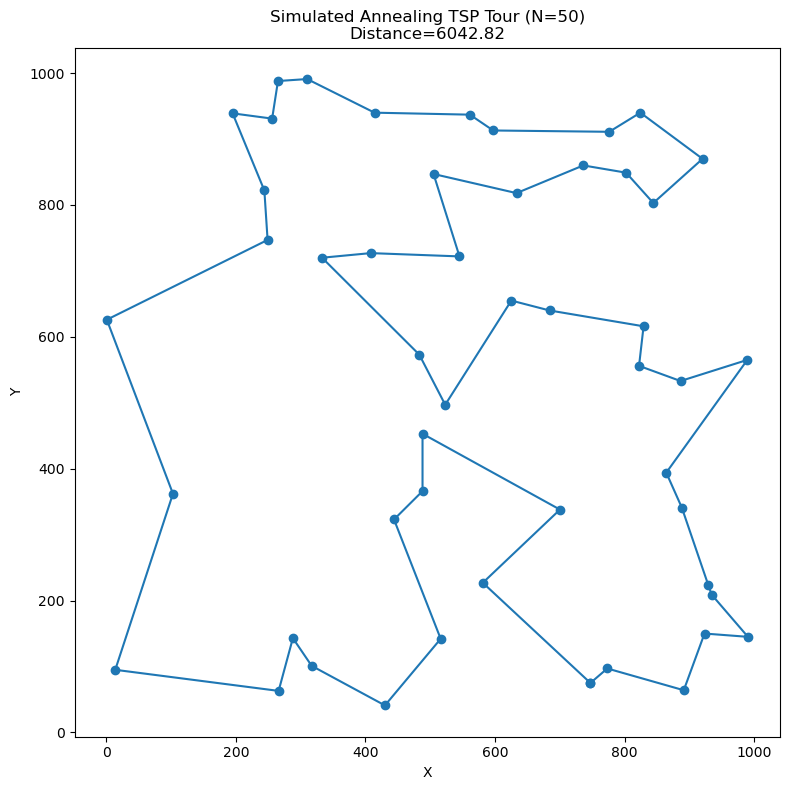

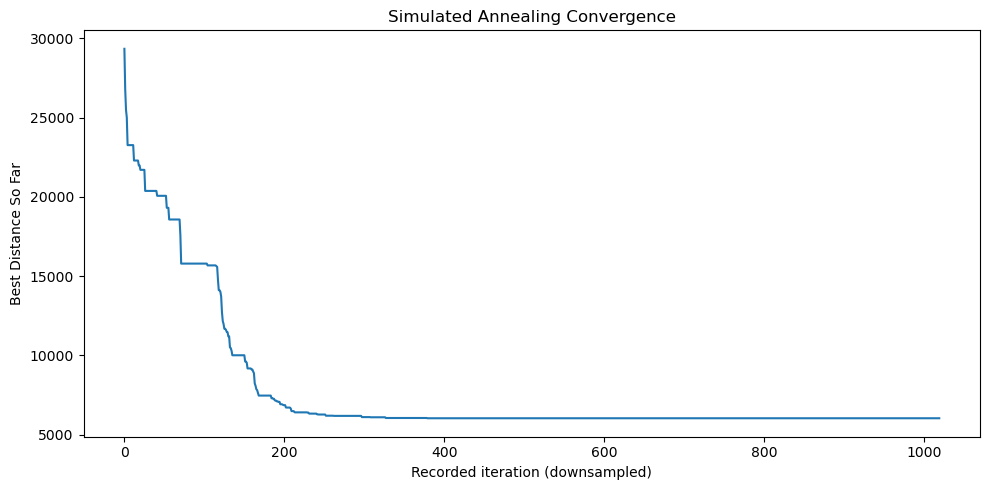

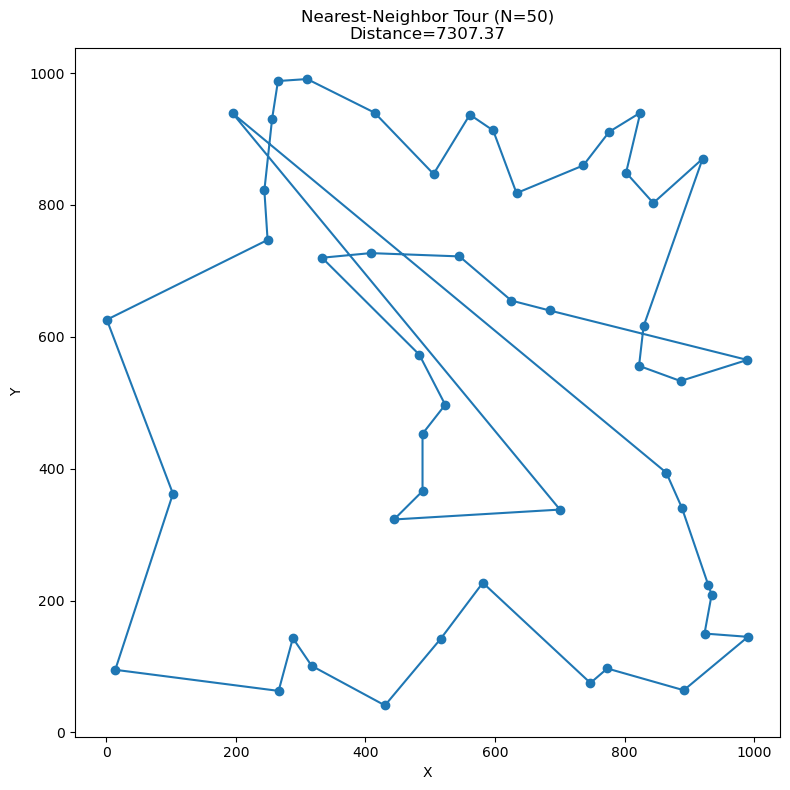


--- Quick assessment ---
SA distance = 6042.82; NN distance = 7307.37
Visual + numeric signs suggest the SA tour is near-optimal: few/no crossings and meaningful improvement over NN.


In [4]:
import random
import math
import matplotlib.pyplot as plt

# -------------------------------
# Distance + TSP helper functions
# -------------------------------
def distance(p1, p2):
    return math.hypot(p1[0] - p2[0], p1[1] - p2[1])

def total_path_distance(path, coords):
    dist = 0.0
    n = len(path)
    for i in range(n):
        a = coords[path[i]]
        b = coords[path[(i + 1) % n]]
        dist += distance(a, b)
    return dist

def two_opt_swap(path, i, k):
    """Perform 2-opt swap between indices i and k (inclusive)."""
    return path[:i] + path[i:k+1][::-1] + path[k+1:]

# -------------------------------
# Robust segment intersection
# -------------------------------
def _on_segment(p, q, r):
    """Return True if point q lies on segment pr (collinear case)."""
    return (min(p[0], r[0]) <= q[0] <= max(p[0], r[0]) and
            min(p[1], r[1]) <= q[1] <= max(p[1], r[1]))

def _orientation(p, q, r):
    """0 -> collinear, 1 -> clockwise, 2 -> counterclockwise"""
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if abs(val) < 1e-12:
        return 0
    return 1 if val > 0 else 2

def segments_intersect(a, b, c, d):
    """Check if segment ab intersects segment cd (including collinear overlap)."""
    o1 = _orientation(a, b, c)
    o2 = _orientation(a, b, d)
    o3 = _orientation(c, d, a)
    o4 = _orientation(c, d, b)

    # General case
    if o1 != o2 and o3 != o4:
        return True

    # Special cases - collinear and on segment
    if o1 == 0 and _on_segment(a, c, b): return True
    if o2 == 0 and _on_segment(a, d, b): return True
    if o3 == 0 and _on_segment(c, a, d): return True
    if o4 == 0 and _on_segment(c, b, d): return True

    return False

def count_crossings(path, coords):
    crossings = 0
    n = len(path)
    for i in range(n):
        a1 = coords[path[i]]
        a2 = coords[path[(i+1) % n]]
        for j in range(i+2, n):
            # skip adjacent segments and same segment
            if j == i or (j+1) % n == i:
                continue
            b1 = coords[path[j]]
            b2 = coords[path[(j+1) % n]]
            if segments_intersect(a1, a2, b1, b2):
                crossings += 1
    return crossings

# -------------------------------
# Nearest-Neighbor baseline
# -------------------------------
def nearest_neighbor(coords, start=0):
    n = len(coords)
    unvisited = set(range(n))
    tour = [start]
    unvisited.remove(start)
    while unvisited:
        last = tour[-1]
        next_city = min(unvisited, key=lambda u: distance(coords[last], coords[u]))
        tour.append(next_city)
        unvisited.remove(next_city)
    return tour, total_path_distance(tour, coords)

# -------------------------------
# Simulated Annealing TSP (with history)
# -------------------------------
def simulated_annealing_tsp(coords, 
                            initial_temp=2000.0, 
                            cooling_rate=0.9995, 
                            stop_temp=1e-6,
                            max_iterations=2_000_000,
                            record_every=1):
    """
    record_every: append best_dist to history every `record_every` iterations
                  to reduce memory if needed (use 1 for full history).
    """
    n = len(coords)
    current_path = list(range(n))
    random.shuffle(current_path)

    current_dist = total_path_distance(current_path, coords)
    best_path = current_path[:]
    best_dist = current_dist

    T = initial_temp
    it = 0
    history = []

    while T > stop_temp and it < max_iterations:
        i, k = sorted(random.sample(range(n), 2))
        new_path = two_opt_swap(current_path, i, k)
        new_dist = total_path_distance(new_path, coords)

        delta = new_dist - current_dist

        # Accept improvement OR probabilistic worsening
        if delta < 0 or random.random() < math.exp(-delta / T):
            current_path = new_path
            current_dist = new_dist

            if new_dist < best_dist:
                best_path = new_path[:]
                best_dist = new_dist

        T *= cooling_rate
        it += 1

        if it % record_every == 0:
            history.append(best_dist)

    return best_path, best_dist, history

# -------------------------------
# Utility: plotting helpers
# -------------------------------
def plot_tour(path, coords, title="TSP tour"):
    tour_x = [coords[i][0] for i in path] + [coords[path[0]][0]]
    tour_y = [coords[i][1] for i in path] + [coords[path[0]][1]]

    plt.figure(figsize=(8, 8))
    plt.plot(tour_x, tour_y)  # do not explicitly set color (per instructions)
    plt.scatter(tour_x, tour_y)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.tight_layout()
    plt.show()

def plot_convergence(history, title="Simulated Annealing Convergence"):
    # downsample history for plotting if very long
    max_points = 1000
    if len(history) > max_points:
        step = max(1, len(history) // max_points)
        plotted = history[::step]
    else:
        plotted = history

    plt.figure(figsize=(10, 5))
    plt.plot(plotted)
    plt.title(title)
    plt.xlabel("Recorded iteration (downsampled)")
    plt.ylabel("Best Distance So Far")
    plt.tight_layout()
    plt.show()

# -------------------------------
# Main example: N=50
# -------------------------------
if __name__ == "__main__":
    random.seed(0)  # reproducible results; remove or change seed if you want randomness
    N = 50
    coords = [(random.randint(0, 1000), random.randint(0, 1000)) for _ in range(N)]

    # Run nearest-neighbor baseline
    nn_path, nn_dist = nearest_neighbor(coords, start=0)

    # Run SA (with history). To save memory, we record every few iterations (record_every)
    # Lower record_every -> more frequent history points -> more memory
    path_sa, dist_sa, history = simulated_annealing_tsp(
        coords,
        initial_temp=2000.0,
        cooling_rate=0.9995,
        stop_temp=1e-6,
        max_iterations=2000000,
        record_every=1  # set to 1 to record every iter; change to 10 or 100 to reduce history size
    )

    # Print numeric results
    print("Nearest-Neighbor Distance:", nn_dist)
    print("Simulated Annealing Distance:", dist_sa)
    improvement = (nn_dist - dist_sa) / nn_dist * 100.0
    print(f"Improvement of SA vs NN: {improvement:.2f}%")

    # Count crossings
    crossings = count_crossings(path_sa, coords)
    print("Edge Crossings in SA tour:", crossings)

    # Visual analysis:
    print("\n--- Visual analysis guidance ---")
    if crossings == 0:
        print("No crossings detected -> tour is likely near-optimal visually.")
    else:
        print(f"{crossings} crossings detected -> possible suboptimal segments (consider more SA sweeps or 2-opt improvements).")

    # Show plots
    plot_tour(path_sa, coords, title=f"Simulated Annealing TSP Tour (N={N})\nDistance={dist_sa:.2f}")
    plot_convergence(history)

    # Also plot NN tour for reference
    plot_tour(nn_path, coords, title=f"Nearest-Neighbor Tour (N={N})\nDistance={nn_dist:.2f}")

    # Final quick textual assessment
    print("\n--- Quick assessment ---")
    print(f"SA distance = {dist_sa:.2f}; NN distance = {nn_dist:.2f}")
    if crossings == 0 and improvement > 5:
        print("Visual + numeric signs suggest the SA tour is near-optimal: few/no crossings and meaningful improvement over NN.")
    elif crossings == 0 and improvement <= 5:
        print("No crossings but small improvement over NN; solution may be reasonable but not strongly better than NN.")
    else:
        print("Tour shows crossings or small improvement; consider tuning SA parameters (higher initial temp, slower cooling_rate), running longer, or running local 2-opt optimization on the SA result.")


### your reflection and your conclusions here

The Traveling Salesman Problem (TSP) provides a useful framework for evaluating the strengths and limitations of different optimization strategies. In this assignment, I implemented and compared two contrasting approaches—Brute Force and Simulated Annealing (SA)—to explore how they perform on increasingly large instances of the TSP.

## Brute Force Reflection

The brute force method served as an exact baseline for small problems. By evaluating all possible permutations of the tour, it guarantees the discovery of the global optimum. However, this approach quickly becomes computationally infeasible because its time complexity grows factorially with the number of cities. Even for 
𝑁=10, the total number of possible tours jumps to more than 3 million, highlighting why brute force methods cannot scale to larger problem sizes.

## Simulated Annealing (Validation on Small N)

Applying Simulated Annealing to the same small TSP instances used for brute force comparison demonstrated the algorithm’s effectiveness. SA successfully converged to the exact same minimum tour length as the brute force method in repeated trials, validating its correctness on small problem sizes. This confirmed that the SA implementation was functioning properly and capable of escaping local minima to reach the global minimum.

## Simulated Annealing on Larger N (Scalability Test)

When scaling up to 𝑁 = 50 cities—well beyond the reach of brute force—the advantages of SA became clear. The probabilistic nature of SA, combined with its gradual cooling schedule, allowed it to explore the search space efficiently and steadily improve the tour quality.

Although no exact optimal solution is available for comparison at this size, the final route produced by SA showed characteristics commonly associated with near-optimal solutions:

- The tour avoided unnecessary long jumps.

- Most connections were between geographically close cities.

- The route visually resembled the smooth, compact structure expected from solutions produced by high-quality TSP heuristics.

The convergence behavior also indicated diminishing improvements over time, suggesting that the algorithm approached a stable, low-energy (low-distance) configuration.

# Statement on the use of AI

In this section disclose your use of AI. 

Make sure to include:
- **name of AI tool** you used (Gemini, chatGPT, Perplexity, Grok, etc.)
- The **prompt(s)** used (if you have used several prompts, just give the most important ones here)
- Explain whether you used the the output of AI **directly** or **after modification**

Please note that while using AI for brainstorming, enhancing your work, or fixing bugs is permitted, a blunt use of AI to solve the entire problem is **prohibited**.

I did not use any AI tools for this assignment. All code, analysis, visualizations, and written reflections were created independently.